In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [41]:
df = pd.read_csv(r'E:\LPU\Placements\Upgrad\EDA_Statistics\Tableau\Uber Request Data.csv')

## Data Cleaning

In [42]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
Requesting_Hours     6745 non-null int64
Requesting_Date      6745 non-null object
Requesting_Time      6745 non-null object
Droped_Time          2831 non-null object
dtypes: int64(3), object(7)
memory usage: 527.0+ KB


In [173]:
df['Driver id'] = df['Driver id'].fillna(0)
#df['Driver id'].isnull()

In [176]:
#
df['Driver id'] = df['Driver id'].astype('int64')

In [44]:
#Creating Requesting Hours column to visualize the most demanding slot
df["Requesting_Hours"] = pd.DatetimeIndex(df['Request timestamp']).hour

In [45]:
#Creating Requesting Date column
df["Requesting_Date"] = pd.DatetimeIndex(df['Request timestamp']).date

In [46]:
#Creating Requesting Time column
df["Requesting_Time"] = pd.DatetimeIndex(df['Request timestamp']).time

In [51]:
#Creating Dropping Time column
df["Droped_Time"] = pd.DatetimeIndex(df['Drop timestamp']).time

In [177]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requesting_Hours,Requesting_Date,Requesting_Time,Droped_Time
0,619,Airport,1,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11,2016-11-07,11:51:00,13:00:00
1,867,Airport,1,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,17,2016-11-07,17:57:00,18:47:00
2,1807,City,1,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,9,2016-12-07,09:17:00,09:58:00
3,2532,Airport,1,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,21,2016-12-07,21:08:00,22:03:00
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,8,2016-07-13,08:33:00,09:25:00


In [178]:
df.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requesting_Hours,Requesting_Date,Requesting_Time,Droped_Time
6740,6745,City,0,No Cars Available,15-07-2016 23:49,NaN,23,2016-07-15,23:49:00,NaT
6741,6752,Airport,0,No Cars Available,15-07-2016 23:50,NaN,23,2016-07-15,23:50:00,NaT
6742,6751,City,0,No Cars Available,15-07-2016 23:52,NaN,23,2016-07-15,23:52:00,NaT
6743,6754,City,0,No Cars Available,15-07-2016 23:54,NaN,23,2016-07-15,23:54:00,NaT
6744,6753,Airport,0,No Cars Available,15-07-2016 23:55,NaN,23,2016-07-15,23:55:00,NaT


## Visualization

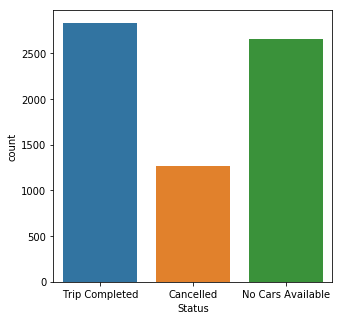

In [182]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Status',data = df) #Count plot shows the frequency distribution of catogeries of specific column
plt.savefig("1_Frequency_Status.jpg") #It will save the figure in .jpg format

In [186]:
#
City_Count = df.groupby(['Pickup point']).get_group('City')
City_Count = (City_Count.loc[City_Count['Status']!='Trip Completed','Status'].count()/df['Status'].count())*100
#
Air_Count = df.groupby(['Pickup point']).get_group('Airport')
Air_Count = (Air_Count.loc[Air_Count['Status']!='Trip Completed','Status'].count()/df['Status'].count())*100
Air_Count
#
per = (df.loc[df['Status']=='Trip Completed','Status'].count()/df['Status'].count())*100
#
size = [City_Count,Air_Count,per]
#
labels = ('City to Airport','Airport to City','Any Type of request')
#
colors = ['lightcoral','lightskyblue','yellowgreen']
#
explode = (0.05, 0.05, 0)

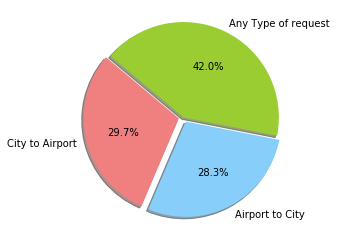

In [187]:
plt.pie(size, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
warnings.filterwarnings('ignore')
plt.savefig("2_Problematic_graph")

### The pie chart which shows the type of request. The City  to airport causes the most problem when compared to others.
### On Overall 42% is reaching the demand and remaining 29.7% cause is on City to Airport and rest 28.3% is on Airport to city.

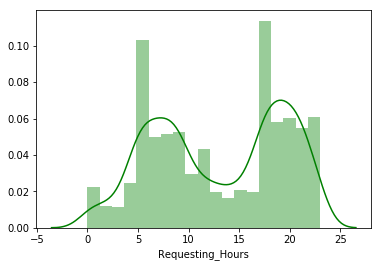

In [216]:
#sns.countplot(x='Requesting_Hours',data=df)
sns.distplot(df['Requesting_Hours'],kde = True,color = 'g')
warnings.filterwarnings('ignore')

### This graph tells about the overall change in the requesting hours of the customers.
### It shows the most peak time is either in early morning or late evening.

In [197]:
def fun(x):
    if(x>=4 and x<=8):
        return 'Early Morning'
    elif(x>=9 and x<=12):
        return 'Morning'
    elif(x>=13 and x<=16):
        return 'Evening'
    elif(x>=17 and x<=21):
        return 'Late Evening'
    elif(x>=22 and x<=23):
        return 'Nights'
    else:
        return "Mid Night"
    
df['Time_Slot'] = df['Requesting_Hours'].apply(fun)

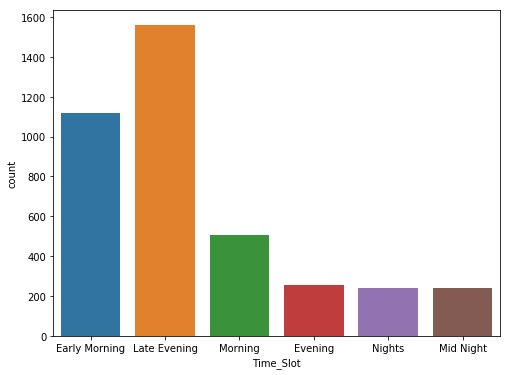

In [245]:
plt.figure(figsize = (8,6))
sns.countplot(x='Time_Slot',data = df[df['Status']!='Trip Completed'])
plt.savefig("3_TimeSlot")
warnings.filterwarnings('ignore')

In [232]:
Demand_EM = df.groupby("Time_Slot").get_group('Early Morning').loc[:,'Request timestamp'].count()
Supply_EM = df.groupby("Time_Slot").get_group('Early Morning').loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_LM = df.groupby("Time_Slot").get_group('Late Evening').loc[:,'Request timestamp'].count()
Supply_LM = df.groupby("Time_Slot").get_group('Late Evening').loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_M = df.groupby("Time_Slot").get_group('Morning').loc[:,'Request timestamp'].count()
Supply_M = df.groupby("Time_Slot").get_group('Morning').loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_E = df.groupby("Time_Slot").get_group('Evening').loc[:,'Request timestamp'].count()
Supply_E = df.groupby("Time_Slot").get_group('Evening').loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_N = df.groupby("Time_Slot").get_group('Nights').loc[:,'Request timestamp'].count()
Supply_N = df.groupby("Time_Slot").get_group('Nights').loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_MN = df.groupby("Time_Slot").get_group("Mid Night").loc[:,'Request timestamp'].count()
Supply_MN = df.groupby("Time_Slot").get_group("Mid Night").loc[df.Droped_Time.notnull(),'Drop timestamp'].count()
Demand_EM
Supply_EM
De = [Demand_EM, Demand_LM, Demand_M, Demand_E, Demand_N, Demand_MN]
Su = [Supply_EM, Supply_LM, Supply_M, Supply_E, Supply_N, Supply_MN]
index = ['Early Morning', 'Late Evening', 'Morning', 'Evening', 'Nights', "Mid Night"]

### This bar chart says the Demand-supply bar chart of the cabs according to time
### It says there is a huge gap between demand and supply in different slots.
### And most is on Late Evening.

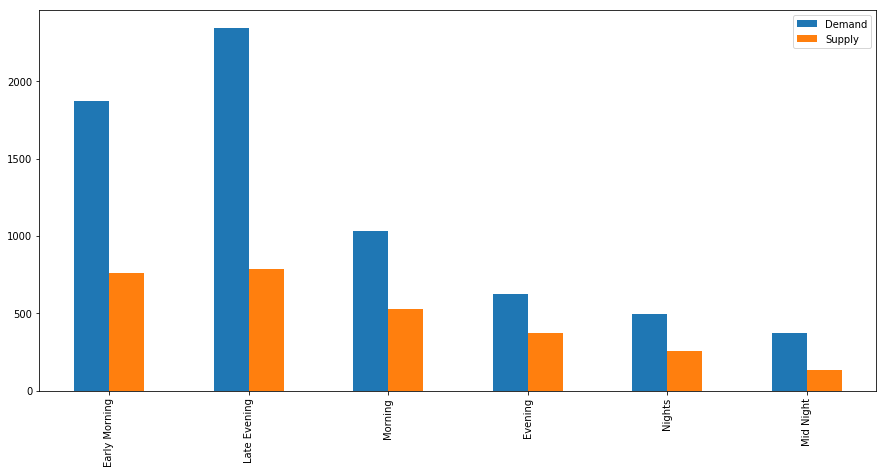

In [244]:
Gap = pd.DataFrame({'Demand': De,'Supply': Su}, index=index)
Gap.plot.bar(figsize=(15,7))
warnings.filterwarnings('ignore')

# Some Solutions to Demand and Supply Problem


### At late evening there is no time supply for the required demand.
### Like most of flights coming in to the airport at nights their no cabs at near surroundings.
### One is we can appoint more partner cabs at late evening near port with some high fare of 1.5 such he can meet his daily wage.
### Or we point new zone as cab point only for cab services at airports.